# Use all the resampling techniques & cross validation techniques & measure the accuracy using KNN Classifier. Compare the accuracy with sampling data & without sampling data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('new Churn.xlsx')

In [3]:
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [4]:
df.describe()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,...,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,3548.566641,0.513631,0.159788,0.484476,0.300265,32.413858,0.903635,0.952480,0.872586,0.788716,...,0.897009,0.793260,0.990913,0.995456,0.691405,0.587656,1.572889,64.762609,3271.963839,0.263158
std,2030.343422,0.499861,0.366444,0.499806,0.458417,24.489220,0.295119,0.949499,0.738896,0.859161,...,0.878747,0.860266,0.884717,0.884752,0.831699,0.492303,1.069134,30.125932,1886.476192,0.440389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1806.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.450000,1616.250000,0.000000
50%,3562.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,3274.500000,0.000000
75%,5304.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4915.750000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.600000,6530.000000,1.000000


In [5]:
df.shape

(5282, 21)

In [6]:
df.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.corr(numeric_only=True)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.000100,0.000731,-0.001294,-0.011669,0.001884,-0.034278,-0.013540,-0.018709,-0.006494,...,-0.013033,0.006410,-0.005278,-0.020546,-0.003440,0.010875,0.025083,-0.014253,0.015267,0.010374
gender,-0.000100,1.000000,-0.005691,-0.010143,0.011058,0.001303,-0.009706,-0.000430,-0.005294,-0.020189,...,-0.009305,-0.010619,-0.012994,-0.011420,0.000555,-0.014090,0.010188,-0.018822,-0.022718,-0.011997
SeniorCitizen,0.000731,-0.005691,1.000000,0.016648,-0.211271,0.006176,0.000581,0.129040,-0.040186,-0.129719,...,-0.015922,-0.151078,0.024338,0.043124,-0.151939,0.156417,-0.035050,0.219945,0.040956,0.146549
Partner,-0.001294,-0.010143,0.016648,1.000000,0.447629,0.382432,0.031578,0.151068,0.007205,0.159928,...,0.168815,0.132582,0.136715,0.122310,0.303243,-0.020634,-0.160535,0.105603,0.069859,-0.150053
Dependents,-0.011669,0.011058,-0.211271,0.447629,1.000000,0.162933,-0.005830,-0.020722,0.041972,0.157262,...,0.076783,0.137274,0.045948,0.023907,0.243080,-0.109935,-0.040414,-0.114920,-0.013196,-0.164490
tenure,0.001884,0.001303,0.006176,0.382432,0.162933,1.000000,0.005912,0.354790,-0.032037,0.325451,...,0.369331,0.326993,0.288135,0.301600,0.671184,0.004043,-0.360323,0.253605,0.152843,-0.345544
PhoneService,-0.034278,-0.009706,0.000581,0.031578,-0.005830,0.005912,1.000000,-0.016345,0.385682,-0.007874,...,0.000422,-0.006139,0.055390,0.048362,0.005342,0.014489,0.006362,0.247419,0.081045,0.010122
MultipleLines,-0.013540,-0.000430,0.129040,0.151068,-0.020722,0.354790,-0.016345,1.000000,-0.105796,0.006028,...,0.132798,0.019266,0.172380,0.188860,0.120023,0.172369,-0.176313,0.436398,0.118773,0.031270
InternetService,-0.018709,-0.005294,-0.040186,0.007205,0.041972,-0.032037,0.385682,-0.105796,1.000000,-0.027201,...,0.048320,-0.018510,0.101060,0.092672,0.097158,-0.141856,0.095054,-0.325588,-0.064748,-0.048820
OnlineSecurity,-0.006494,-0.020189,-0.129719,0.159928,0.157262,0.325451,-0.007874,0.006028,-0.027201,1.000000,...,0.182355,0.276510,0.057760,0.065996,0.371159,-0.146473,-0.085892,-0.049605,0.036493,-0.288926


<Axes: >

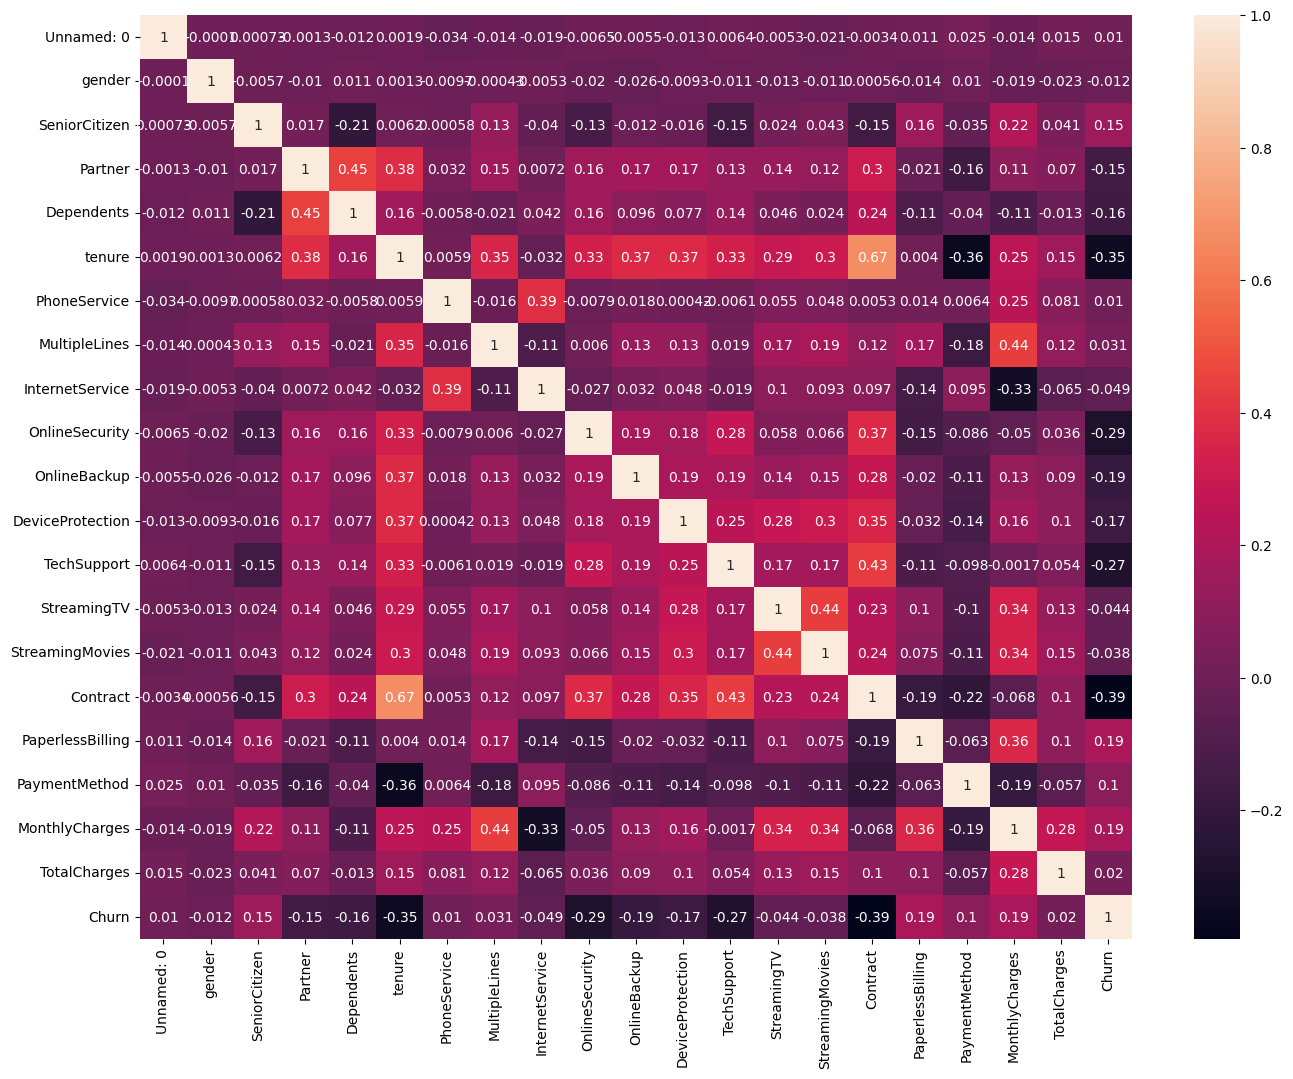

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Churn', ylabel='count'>

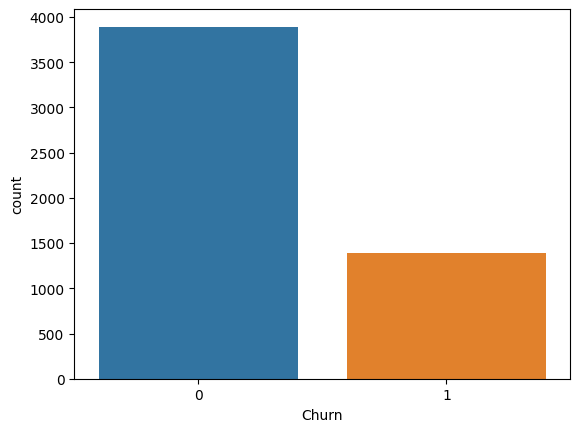

In [9]:
sns.countplot(x='Churn',data=df)

<Axes: xlabel='gender', ylabel='count'>

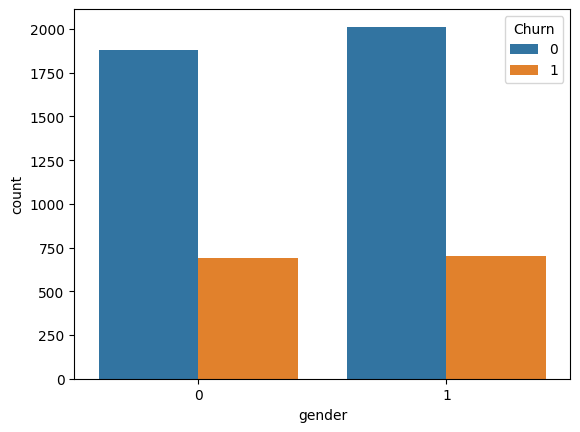

In [10]:
sns.countplot(x='gender',hue='Churn',data=df)

# Split x,y

In [11]:
x=df.drop('Churn',axis=1)
y = df[['Churn']]

In [12]:
x.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,6607,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,2598,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2,2345,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
3,4093,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
4,693,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [13]:
y.head()

,Churn
0,1
1,0
2,0
3,0
4,1


# Check imbalanced data set

In [14]:
df.Churn.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [15]:
not_churned = (3892/(3892+1390))*100
churned = (1390/(3892+1390))*100

In [16]:
print('Not Churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not Churned 73.68421052631578 percent of total people
Churned 26.31578947368421 percent of total people


<function matplotlib.pyplot.show(close=None, block=None)>

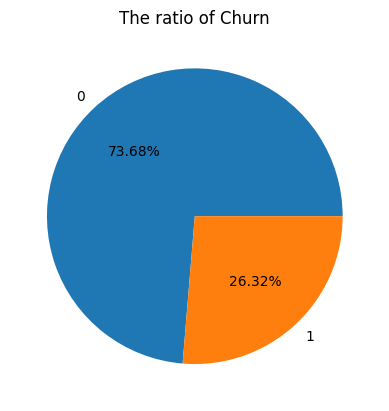

In [64]:
plt.pie(x = df['Churn'].value_counts() ,autopct='%1.2f%%' ,labels=df['Churn'].value_counts().index)
plt.title('The ratio of Churn')
plt.show

# Handle imbalanced data Using different type of sampling and imblearn function will do the sampling

# 1. Synthetic Minority Oversampling Technique(SMOTE)

In [17]:
from imblearn.combine import SMOTETomek #works following knn classification 
sm = SMOTETomek(random_state=44)

In [18]:
y.value_counts() #before sampling

Churn
0        3892
1        1390
Name: count, dtype: int64

In [19]:
X,Y = sm.fit_resample(x,y)

In [20]:
Y.value_counts() #after sampling

Churn
0        3537
1        3537
Name: count, dtype: int64

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size=0.3,random_state=52)

In [23]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [24]:
knn_pred = knn.predict(xtest)
knn_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

# Hold out cross validation for SMOTE

In [25]:
knn_accuracy_SMOTE_Hoc = knn.score(xtest,ytest)
knn_accuracy_SMOTE_Hoc

0.7338671691003297

# K fold Cross validation for SMOTE

In [26]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=4)

In [27]:
knn_accuracy_SMOTE_kfc = cross_val_score(knn,X,Y,cv=kfold)

In [28]:
knn_accuracy_SMOTE_kfc

array([0.62690786, 0.64443188, 0.71323529, 0.72624434])

In [29]:
knn_accuracy_SMOTE_kfc_mean =knn_accuracy_SMOTE_kfc.mean()

In [30]:
knn_accuracy_SMOTE_kfc_mean

0.6777048444937831

# Stratified K Fold Cross Validation for SMOTE

In [31]:
from sklearn.model_selection import StratifiedKFold
st = StratifiedKFold(n_splits=4)
knn_accuracy_SMOTE_Skfc = cross_val_score(knn,X,Y,cv=st)
knn_accuracy_SMOTE_Skfc_mean = knn_accuracy_SMOTE_Skfc.mean()
knn_accuracy_SMOTE_Skfc_mean

0.7400378629949175

# Leave one out cross validation for SMOTE

In [32]:
from sklearn.model_selection import LeaveOneOut
le = LeaveOneOut()

In [33]:
knn_accuracy_SMOTE_looc = cross_val_score(knn,X,Y,cv=le)

In [34]:
knn_accuracy_SMOTE_looc_mean = knn_accuracy_SMOTE_looc.mean()

In [35]:
knn_accuracy_SMOTE_looc_mean

0.7618037885213458

# 2. Near Miss for under sampling

In [36]:
from imblearn.under_sampling import NearMiss #It is not perfet for medical research data sampling
nm = NearMiss()
new_x,new_y = nm.fit_resample(x,y) 

In [37]:
new_y.value_counts()

Churn
0        1390
1        1390
Name: count, dtype: int64

In [38]:
xtrain,xtest,ytrain,ytest = tts(new_x,new_y,test_size=0.3,random_state=52)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [39]:
knn_pred = knn.predict(xtest)
knn_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,

# Hold out cross validation for Near Miss

In [40]:
knn_accuracy_NM_Hoc = knn.score(xtest,ytest)
knn_accuracy_NM_Hoc

0.4304556354916067

# K Fold Cross Validation for Near Miss

In [41]:
knn_accuracy_NM_kfc = cross_val_score(knn,new_x,new_y,cv=kfold)
knn_accuracy_NM_kfc

array([0.09784173, 0.21294964, 0.15971223, 0.15827338])

In [42]:
knn_accuracy_NM_kfc_mean = knn_accuracy_NM_kfc.mean()
knn_accuracy_NM_kfc_mean

0.15719424460431655

# Stratified K Fold Cross Validation for Near Miss

In [43]:
knn_accuracy_NM_Skfc = cross_val_score(knn,new_x,new_y,cv=st)
knn_accuracy_NM_Skfc_mean =knn_accuracy_NM_Skfc.mean()
knn_accuracy_NM_Skfc_mean

0.3985611510791367

# Leave one out cross validation for Near Miss

In [44]:
knn_accuracy_NM_looc = cross_val_score(knn,new_x,new_y,cv=le)
knn_accuracy_NM_looc_mean = knn_accuracy_NM_looc.mean()
knn_accuracy_NM_looc_mean

0.4093525179856115

# 3. Over Sampling

In [45]:
df.Churn.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=44)

In [47]:
x_new, y_new =over.fit_resample(x,y)

In [48]:
y_new.value_counts()

Churn
0        3892
1        3892
Name: count, dtype: int64

In [49]:
xtrain,xtest,ytrain,ytest = tts(x_new,y_new,test_size=0.3,random_state=52)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [50]:
knn_pred = knn.predict(xtest)
knn_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

# Hold out cross validation for Over Sampling

In [51]:
knn_accuracy_over_Hoc = knn.score(xtest,ytest)
knn_accuracy_over_Hoc

0.6823630136986302

# K Fold Cross Validation for Over Sampling

In [52]:
knn_accuracy_over_kfc = cross_val_score(knn,x_new,y_new,cv=kfold)
knn_accuracy_over_kfc

array([0.59609455, 0.61408016, 0.66906475, 0.66289825])

In [53]:
knn_accuracy_over_kfc_mean = knn_accuracy_over_kfc.mean()
knn_accuracy_over_kfc_mean

0.6355344295991777

# Stratified K Fold Cross Validation for Over Sampling

In [54]:
knn_accuracy_over_Skfc = cross_val_score(knn,x_new,y_new,cv=st)
knn_accuracy_over_Skfc_mean = knn_accuracy_over_Skfc.mean()
knn_accuracy_over_Skfc_mean

0.7022096608427544

# Leave one out cross validation for Over Sampling

In [55]:
knn_accuracy_over_looc = cross_val_score(knn,x_new,y_new,cv=le)
knn_accuracy_over_looc_mean = knn_accuracy_over_looc.mean()
knn_accuracy_over_looc_mean

0.7433196300102775

# Without Sampling

In [56]:
xtrain1,xtest1,ytrain1,ytest1 = tts(x,y,test_size=.3,random_state=42)
knn.fit(xtrain1, ytrain1)

KNeighborsClassifier(n_neighbors=3)

In [57]:
knn_pred = knn.predict(xtest)
knn_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

# Hold out cross validation

In [58]:
knn_accuracy_Hoc = knn.score(xtest1,ytest1)
knn_accuracy_Hoc

0.6750788643533123

# K Fold cross validation

In [59]:
knn_accuracy_kfc = cross_val_score(knn,xtest1,ytest1,cv=kfold)
knn_accuracy_kfc_mean = knn_accuracy_kfc.mean()
knn_accuracy_kfc_mean

0.6580556827723075

# Stratified K Fold Cross Validation

In [60]:
knn_accuracy_Skfc = cross_val_score(knn,xtest1,ytest1,cv=st)
knn_accuracy_Skfc_mean = knn_accuracy_Skfc.mean()
knn_accuracy_Skfc_mean

0.6567914663002824

# Leave one out cross validation

In [61]:
knn_accuracy_looc = cross_val_score(knn,x_new,y_new,cv=le)
knn_accuracy_looc_mean = knn_accuracy_looc.mean()
knn_accuracy_looc_mean

0.7433196300102775

# Comparison

In [62]:
data = pd.DataFrame({'Cross Validation':['Hold out cross validation','K Fold cross validation','Stratified K Fold cross Validation','Leave one out cross validation'],
       'SMOTE Sampling': [knn_accuracy_SMOTE_Hoc,knn_accuracy_SMOTE_kfc_mean,knn_accuracy_SMOTE_Skfc_mean,knn_accuracy_SMOTE_looc_mean],
       'Near Miss Sampling': [knn_accuracy_NM_Hoc,knn_accuracy_NM_kfc_mean,knn_accuracy_NM_Skfc_mean,knn_accuracy_NM_looc_mean],
       'Over Sampling': [knn_accuracy_over_Hoc,knn_accuracy_over_kfc_mean,knn_accuracy_over_Skfc_mean,knn_accuracy_over_looc_mean],
       'Without Sampling': [knn_accuracy_Hoc,knn_accuracy_kfc_mean,knn_accuracy_Skfc_mean,knn_accuracy_looc_mean]})
data.head()

,Cross Validation,SMOTE Sampling,Near Miss Sampling,Over Sampling,Without Sampling
0,Hold out cross validation,0.733867,0.430456,0.682363,0.675079
1,K Fold cross validation,0.677705,0.157194,0.635534,0.658056
2,Stratified K Fold cross Validation,0.740038,0.398561,0.702210,0.656791
3,Leave one out cross validation,0.761804,0.409353,0.743320,0.743320
